In [1]:
import os
import numpy as np
import itertools
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
LABEL_NAMES = ['ZERO','ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SIX', 'SEVEN', 'EIGHT', 'NINE']
IMAGE_WIDTH = 28
IMAGE_BREADTH = 28
NR_CLASSES = 10
TOTAL_INPUTS = IMAGE_WIDTH*IMAGE_BREADTH
VALIDATION_SIZE = 10000

In [3]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

In [4]:
X_train_all.shape

(60000, 28, 28)

In [5]:
y_train_all.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test1 = np.expand_dims(X_test, -1)

In [8]:
X_test1.shape

(10000, 28, 28, 1)

In [9]:
X_train_all = np.expand_dims(X_train_all, -1)
X_train_all.shape

(60000, 28, 28, 1)

In [10]:
num = array_to_img(X_train_all[10])
num

In [11]:
y_train_all.shape

(60000,)

In [12]:
y_train_all[10]

3

In [13]:
LABEL_NAMES[y_train_all[10]]

'THREE'

In [14]:
X_train_all = X_train_all.reshape(X_train_all.shape[0], TOTAL_INPUTS)

In [15]:
X_train_all.shape

(60000, 784)

In [16]:
y_train_all.shape

(60000,)

In [17]:
y_train_all = y_train_all.reshape(y_train_all.shape[0],1)

In [18]:
y_train_all.shape

(60000, 1)

In [19]:
X_train_all, X_test = X_train_all/255, X_test/255

In [20]:
X_train_all.shape

(60000, 784)

In [21]:
y_train_all.shape

(60000, 1)

In [22]:
X_val= X_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [23]:
X_val.shape

(10000, 784)

In [24]:
y_val.shape

(10000, 1)

In [25]:
X_train = X_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

In [26]:
X_train.shape

(50000, 784)

In [27]:
y_train.shape

(50000, 1)

In [28]:
X_test.shape

(10000, 28, 28)

In [29]:
X_test = X_test.reshape(X_test.shape[0], TOTAL_INPUTS)
X_test.shape

(10000, 784)

In [30]:
y_test.shape

(10000,)

In [31]:
y_test = y_test.reshape(y_test.shape[0], 1)
y_test.shape

(10000, 1)

In [32]:
model_1 = Sequential()

In [33]:
model_1.add(Dense(units = 256, input_dim = TOTAL_INPUTS, activation = 'relu', name = 'hidden_1'))
model_1.add(Dense(units = 128, activation = 'relu', name = 'hidden_2'))
model_1.add(Dense(units = 32, activation = 'relu', name = 'hidden_3'))
model_1.add(Dense(units = 10, activation = 'softmax', name = 'outputs'))

In [34]:
model_1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [35]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_1 (Dense)            (None, 256)               200960    
                                                                 
 hidden_2 (Dense)            (None, 128)               32896     
                                                                 
 hidden_3 (Dense)            (None, 32)                4128      
                                                                 
 outputs (Dense)             (None, 10)                330       
                                                                 
Total params: 238,314
Trainable params: 238,314
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model_1.fit(X_train, y_train, batch_size = 1000, epochs = 100, verbose =1, validation_data = (X_val, y_val))
print(history.history.keys())

Epoch 1/100
50/50 [==============================] - 6s 31ms/step - loss: 0.8297 - accuracy: 0.7718 - val_loss: 0.2843 - val_accuracy: 0.9192
Epoch 2/100
50/50 [==============================] - 1s 19ms/step - loss: 0.2352 - accuracy: 0.9324 - val_loss: 0.1998 - val_accuracy: 0.9432
Epoch 3/100
50/50 [==============================] - 1s 19ms/step - loss: 0.1716 - accuracy: 0.9504 - val_loss: 0.1710 - val_accuracy: 0.9505
Epoch 4/100
50/50 [==============================] - 1s 20ms/step - loss: 0.1368 - accuracy: 0.9612 - val_loss: 0.1356 - val_accuracy: 0.9598
Epoch 5/100
50/50 [==============================] - 1s 19ms/step - loss: 0.1130 - accuracy: 0.9674 - val_loss: 0.1232 - val_accuracy: 0.9651
Epoch 6/100
50/50 [==============================] - 1s 19ms/step - loss: 0.0928 - accuracy: 0.9736 - val_loss: 0.1128 - val_accuracy: 0.9667
Epoch 7/100
50/50 [==============================] - 1s 19ms/step - loss: 0.0798 - accuracy: 0.9771 - val_loss: 0.1075 - val_accuracy: 0.9678
Epoch 

Epoch 58/100
50/50 [==============================] - 1s 18ms/step - loss: 2.0891e-04 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9790
Epoch 59/100
50/50 [==============================] - 1s 19ms/step - loss: 1.9630e-04 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9787
Epoch 60/100
50/50 [==============================] - 1s 19ms/step - loss: 1.8400e-04 - accuracy: 1.0000 - val_loss: 0.1128 - val_accuracy: 0.9793
Epoch 61/100
50/50 [==============================] - 1s 19ms/step - loss: 1.7415e-04 - accuracy: 1.0000 - val_loss: 0.1132 - val_accuracy: 0.9789
Epoch 62/100
50/50 [==============================] - 1s 18ms/step - loss: 1.6621e-04 - accuracy: 1.0000 - val_loss: 0.1138 - val_accuracy: 0.9789
Epoch 63/100
50/50 [==============================] - 1s 19ms/step - loss: 1.5692e-04 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9786
Epoch 64/100
50/50 [==============================] - 1s 20ms/step - loss: 1.4982e-04 - accuracy: 1.0000 - val_loss: 0

In [37]:
y_pred = np.argmax(model_1.predict(X_test), axis =1)

313/313 [==============================] - 1s 3ms/step


In [38]:
y_pred.shape

(10000,)

In [39]:
y_pred[0]

7

In [40]:
y_test[0][0]

7

In [41]:
y_pred = y_pred.reshape(y_pred.shape[0],1)

In [42]:
y_pred.shape

(10000, 1)

In [43]:
cm = confusion_matrix(y_test, y_pred)

In [44]:
print(cm)

[[ 969    0    0    0    1    4    1    2    2    1]
 [   0 1127    2    0    0    0    2    1    3    0]
 [   3    3 1005    4    2    0    3    5    7    0]
 [   0    0    3  993    0    5    0    3    3    3]
 [   1    1    2    1  959    0    6    3    2    7]
 [   3    0    0   10    1  871    2    1    3    1]
 [   5    3    2    1    5    4  938    0    0    0]
 [   0    4    7    1    0    0    0 1007    5    4]
 [   5    0    3    6    1    3    3    3  943    7]
 [   2    2    0    5    7    6    0    3    1  983]]


In [45]:
accuracy_score(y_test, y_pred)*100

97.95

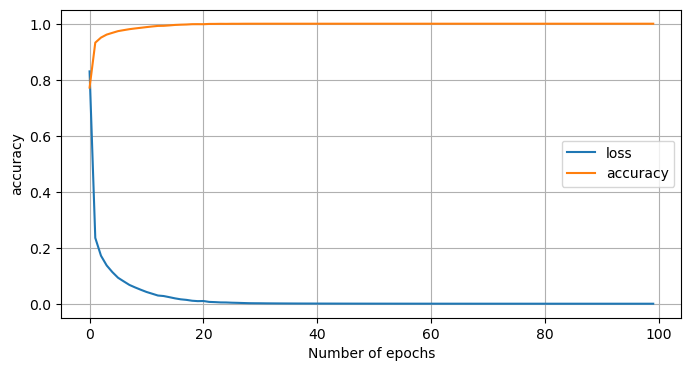

In [46]:
plt.figure(figsize = (8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.show()

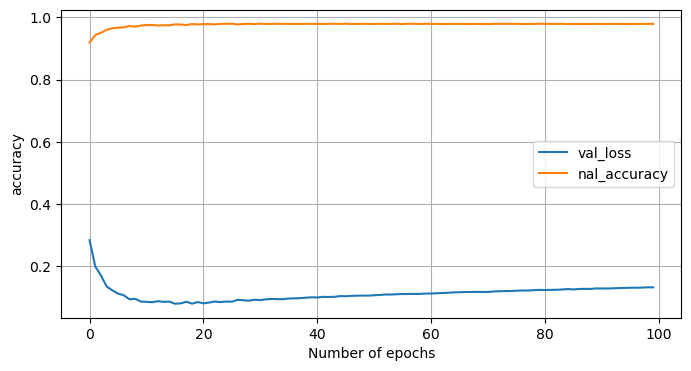

In [47]:
plt.figure(figsize = (8, 4))
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(['val_loss', 'nal_accuracy'])
plt.grid()
plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.show()

In [48]:
mat = np.arange(1, 26)
mat = mat.reshape((5,5))
mat

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

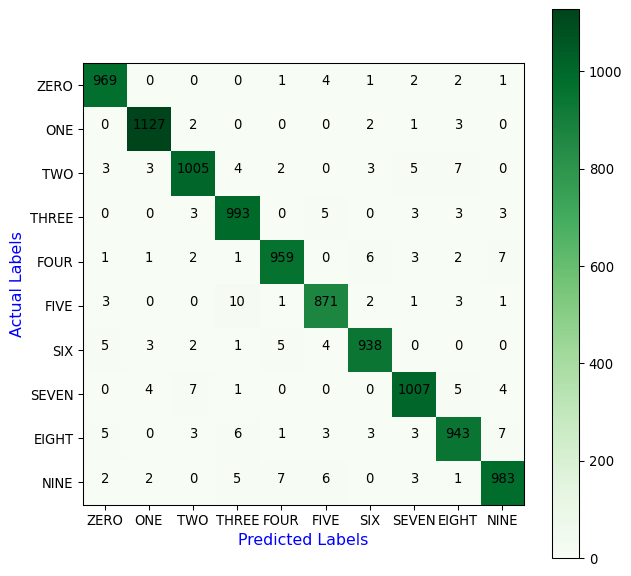

In [49]:
plt.figure(figsize = (7.5,7.5), dpi = 95)
plt.imshow(cm, cmap = plt.cm.Greens)
tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)
plt.ylabel('Actual Labels', fontsize = 12, color = 'blue')
plt.xlabel('Predicted Labels', fontsize = 12, color = 'blue')
plt.colorbar()
for i , j in itertools.product(range(10), range(10)):
    
    plt.text(j,i, cm[i,j], horizontalalignment = 'center')
plt.show()